<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Watermark" data-toc-modified-id="Watermark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Watermark</a></span></li><li><span><a href="#Imports-and-Setups" data-toc-modified-id="Imports-and-Setups-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Setups</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Autoimport-my-code" data-toc-modified-id="Autoimport-my-code-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Autoimport my code</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Plotting</a></span></li></ul></li></ul></li><li><span><a href="#Reminders" data-toc-modified-id="Reminders-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reminders</a></span></li><li><span><a href="#Matera" data-toc-modified-id="Matera-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Matera</a></span><ul class="toc-item"><li><span><a href="#not-coding" data-toc-modified-id="not-coding-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>not coding</a></span></li><li><span><a href="#verification" data-toc-modified-id="verification-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>verification</a></span></li></ul></li><li><span><a href="#float32-lookup-time..." data-toc-modified-id="float32-lookup-time...-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>float32 lookup time...</a></span></li><li><span><a href="#Tracking-gencode-IDs" data-toc-modified-id="Tracking-gencode-IDs-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tracking gencode IDs</a></span></li><li><span><a href="#example" data-toc-modified-id="example-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>example</a></span></li><li><span><a href="#Protein-profiles" data-toc-modified-id="Protein-profiles-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Protein profiles</a></span><ul class="toc-item"><li><span><a href="#Replicates" data-toc-modified-id="Replicates-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Replicates</a></span></li><li><span><a href="#bash-script" data-toc-modified-id="bash-script-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>bash script</a></span></li><li><span><a href="#expressed-exon-coverage" data-toc-modified-id="expressed-exon-coverage-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>expressed exon coverage</a></span></li></ul></li></ul></div>

# Watermark

In [52]:
%load_ext watermark
%watermark -a 'Jessime Kirk' -nmv --packages numpy,scipy,pandas,sklearn,matplotlib,seaborn,networkx,notebook,jupyter_contrib_nbextensions

Jessime Kirk Tue Feb 05 2019 

CPython 3.6.7
IPython 7.2.0

numpy 1.15.4
scipy 1.1.0
pandas 0.23.4
sklearn 0.20.1
matplotlib 3.0.2
seaborn 0.9.0
networkx 2.2
notebook 5.7.4
jupyter_contrib_nbextensions 0.5.0

compiler   : GCC 7.3.0
system     : Linux
release    : 4.15.0-43-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


# Imports and Setups

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from tqdm import tqdm, trange, tqdm_notebook, tnrange

import json

from scipy.stats import describe

from collections import defaultdict

from pathlib import Path

### Autoimport my code

In [2]:
pwd

'/home/jessime/Code/kmers3/Notebooks'

In [3]:
cd ..

/home/jessime/Code/kmers3


In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### Plotting

In [6]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['legend.fontsize'] = 28
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.sans-serif'] = 'Helvetica'
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]

# Reminders

* All images should be saved as pdfs. They can be converted from pdf to png as necessary, but you can’t convert a png to pdf.
* When finished with a notebook, archive it with `jupyter nbconvert --to pdf nb.ipynb`

# Matera

We want to make fly communities for Greg Matera.

> Jessime looks like you can download spliced transcripts for D Melanogaster through refseq. Take a look at the file and what is in it. Probably we can cluster anything that is not annotated as an “mRNA”, but it would be important to look at the summary statistics of all of the categories of transcripts that they classify and use our discretion before pushing ahead. Also, there may be a better dataset than refseq, not sure.
> NCBI->genome->drosophila melanogaster

And, I have my own annotations from Flybase:

Downloads: Releases (FTP): /releases/FB2018_06/precomputed_files/genes/ncRNA_genes_fb_2018_06.json.gz

In [2]:
!grep "lncRNA" /home/jessime/Research/for_others/matera/GCF_000001215.4_Release_6_plus_ISO1_MT_rna.fna | wc -l

2275


In [5]:
flybase = '/home/jessime/Research/for_others/matera/ncRNA_genes_fb_2018_06.json'
flybase = json.load(open(flybase))

In [6]:
flybase.keys()

dict_keys(['data', 'metaData'])

In [7]:
flybase['metaData']

{'release': 'fb_2018_06',
 'schemaVersion': '0.2.0',
 'dateProduced': '2018-11-19T17:41:04+00:00',
 'dataProvider': 'FlyBase'}

In [13]:
flybase['data'][0]

{'url': 'http://flybase.org/reports/FBtr0342950.html',
 'symbol': 'lncRNA:CR44058-RB',
 'soTermId': 'SO:0001877',
 'sequence': 'AATTCAAACTGTATAATTCGAATTTGTCTTAGAATTTCGATTTCAATCAGCAGTATTGGGTATTATTCGAGATGATTCGGCTGAAAATGGAACTGAAGGGAAGTAATCAATCGACTAATAACGCCCCTGGCTAACATTTGCTATCCATTTGCAAATCGCCCCACCTGACGGACTGGCCAAGTTGCGCAGCATGTCCTTTTGCAATATCAACGTTAGTGGCAAACAACAAAATTAGTCAGCAAAACATGGCCGCCCTGCAATTAGCATCATGAGCACCATGCAATTTTGATGACCAAATTGCCATAAACCGGTCACTGACACATACTCCGCAGTCTGGTCTCCGAAAGTCCGGAGGACACTGTACTCAACGGGGCGATAATCATGGAACACTGCACCGCACGCTGATGCCAATCAAAATTCAAAATTTCGACAGTCCGTATATGGCCGTATGCGGCGACCACGCCCCCCTTCTGTCTACCCAAACAAAGGGGGCGGGCGCAGCAGAGCGTGGCTACGTCGATAAGTCACGGACAAAATGGTCAAATGTCAGAGGAGCAACGCGGTTGAGATCATCGGACCGACCACTGGGGCGGTCTCTACACTGGTAAAAAATGCATCGTCGAATTTCAGGTCACTCGTAGTATTAAGCAGATAACACATGCAAATAGGCGTCCGGGAATATTCAGAAGTCTGTGCGCGTGGTTAAAGTGCAGTTTCGGTGACTTGAAAGCGCGTAAGAGTCCGCACACATCCGACGGTGGTGGGTGTTTTTGGGTTGCGAACTGAAGGTGGAGATGGTGCATAAAACTCCATTAGAGCCATAAAAGTTAAAAGCATTTCGCCTGGCAACTGGCAACTGCCAACTGCAGATT

In [14]:
flybase['data'][0].keys()

dict_keys(['url', 'symbol', 'soTermId', 'sequence', 'symbolSynonyms', 'primaryId', 'taxonId', 'genomeLocations', 'crossReferenceIds', 'gene'])

In [15]:
flybase_lncRNAs = [d for d in flybase['data'] if d['symbol'].startswith('lncRNA')]
len(flybase_lncRNAs)

2266

In [21]:
flybase_nr = [fl['crossReferenceIds'][0].split(':')[1] for fl  in flybase_lncRNAs if 'crossReferenceIds' in fl]
flybase_nr_set = set(flybase_nr)

In [30]:
%aimport fasta_reader

In [31]:
infasta = '/home/jessime/Research/for_others/matera/GCF_000001215.4_Release_6_plus_ISO1_MT_rna.fna'
reader = fasta_reader.Reader(infasta)

In [33]:
refseq_headers = reader.get_headers()
refseq_headers[0]

'>NM_001007095.3 Drosophila melanogaster uncharacterized protein, transcript variant C (CG42637), mRNA'

In [35]:
refseq_nr = [h.split()[0].strip('>') for h in refseq_headers if h.endswith('lncRNA')]
refseq_nr_set = set(refseq_nr)

In [37]:
len(flybase_nr_set.intersection(refseq_nr_set))

2258

* Refseq has 2275 lncRNAs
* Flybase has 2266 lncRNA
* 2258 of the lncRNAs are in common

In [45]:
symbols = []
outfasta = '/home/jessime/Research/for_others/matera/flybase_lncs.fa'
with open(outfasta, 'w') as outfasta:
    for lnc in flybase_lncRNAs:
        header = '>'
        for key in ('primaryId', 'taxonId', 'symbol', 'soTermId'):
            value = lnc[key]
            header += f'{key},{value}|'
            if key == 'symbol':
                symbols.append(value)
        if 'crossReferenceIds' in lnc:
            value = lnc['crossReferenceIds'][0]
            header += f'crossReferenceIds:{value}\n'
        else:
            header += 'crossReferenceIds: *\n'
        outfasta.write(header)
        outfasta.write(lnc['sequence'] + '\n')

In [46]:
len(set(symbols))

2266

Good, so we can use symbols as unique identifiers.

In [47]:
counts = '/home/jessime/Research/for_others/matera/6mers.csv'
counts = pd.read_csv(counts, index_col=0)
counts.head()

AAAAAA    AAAAAG  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.519633  0.178124   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.784162  2.050603   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.324252  0.178124   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  0.723467  1.268946   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  1.392217  0.178124   

                                                      AAAAAT    AAAAAC  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.966494  0.175113   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.000000  1.728778   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.000000  2.081498   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  1.034646  0.175113   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  1.138965  1.348987   

                                                      AAAAGA    AAAAGG  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.943810  0.334209   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.303322  2.024142   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.303322  0.334209   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  0.303322  0.334209   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  0.303322  0.334209   

                                                      AAAAGT    AAAAGC  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.959210  0.909778   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  1.110255  0.262406   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.281462  1.094879   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  1.494405  1.429018   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  0.281462  0.262406   

                                                      AAAATA    AAAATG  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.631108  1.445728   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  1.566278  0.149127   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.082453  0.149127   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  0.082453  0.149127   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  1.197578  0.149127   

                                                      ...       CCCCGT  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...    ...     0.679885   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...    ...     0.679885   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...    ...     0.679885   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...    ...     0.679885   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...    ...     0.679885   

                                                      CCCCGC    CCCCTA  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.618190  0.696148   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.618190  0.696148   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  1.959209  0.696148   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  2.402595  0.696148   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  0.618190  0.696148   

                                                      CCCCTG    CCCCTT  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  1.726335  1.526156   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.651100  0.604386   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.651100  0.604386   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  0.651100  0.604386   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  0.651100  0.604386   

                                                      CCCCTC    CCCCCA  \
>primaryId,FLYBASE:FBtr0342950|taxonId,NCBITaxo...  0.608557  0.555614   
>primaryId,FLYBASE:FBtr0347223|taxonId,NCBITaxo...  0.608557  0.555614   
>primaryId,FLYBASE:FBtr0346066|taxonId,NCBITaxo...  0.608557  0.555614   
>primaryId,FLYBASE:FBtr0339615|taxonId,NCBITaxo...  0.608557  0.555614   
>primaryId,FLYBASE:FBtr0345831|taxonId,NCBITaxo...  0.608557  0.555614   

                                                 

In [48]:
adj = np.corrcoef(counts.values)

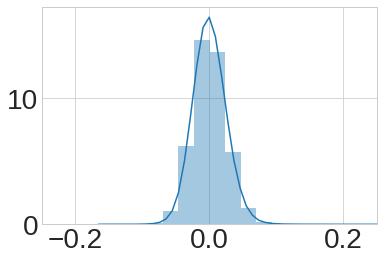

In [50]:
sns.distplot(adj.flatten())
plt.xlim((-.25, .25))
plt.show()

What does this look like for mouse, again?

In [52]:
%aimport kmer_counts

In [53]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


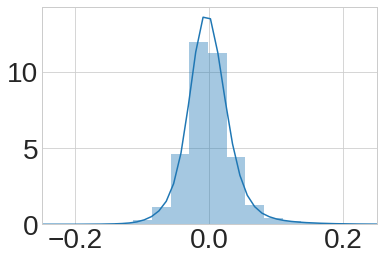

In [54]:
adj = np.corrcoef(counter.counts)
sns.distplot(adj.flatten())
plt.xlim((-.25, .25))
plt.show()

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


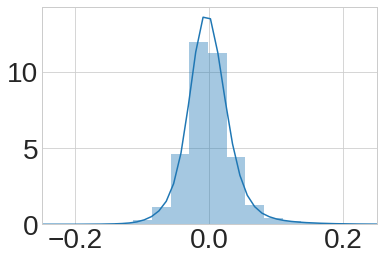

In [55]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta, log2=False)
counter.get_counts()
adj = np.corrcoef(counter.counts)
sns.distplot(adj.flatten())
plt.xlim((-.25, .25))
plt.show()

## not coding

Another way to get "lncRNAs" is all non-mRNA genes that are longer than 200 bp. What do we get if we try that?

In [60]:
flybase_lncRNAs2 = []
for d in flybase['data']:
    if (not d['symbol'].startswith('mRNA')) and (len(d['sequence']) >= 200):
        flybase_lncRNAs2.append(d)
len(flybase_lncRNAs2)

7644

In [61]:
sorted(set(len(d['sequence']) for d in flybase_lncRNAs2))[-10:]

[16249, 16851, 18534, 20512, 20538, 20549, 20581, 20601, 21055, 21216]

In [62]:
symbols = []
outfasta = '/home/jessime/Research/for_others/matera/flybase_lncs2.fa'
with open(outfasta, 'w') as outfasta:
    for lnc in flybase_lncRNAs2:
        header = '>'
        for key in ('primaryId', 'taxonId', 'symbol', 'soTermId'):
            value = lnc[key]
            header += f'{key},{value}|'
            if key == 'symbol':
                symbols.append(value)
        if 'crossReferenceIds' in lnc:
            value = lnc['crossReferenceIds'][0]
            header += f'crossReferenceIds:{value}\n'
        else:
            header += 'crossReferenceIds: *\n'
        outfasta.write(header)
        outfasta.write(lnc['sequence'] + '\n')
len(symbols)

7644

## verification

In [7]:
%aimport kmer_counts

In [9]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta, log2=False)
counter.get_counts()

In [10]:
seekr_counts = '/home/jessime/Desktop/M5_6mers.npy'
seekr_counts = np.load(seekr_counts)

In [12]:
np.allclose(counter.counts, seekr_counts)

True

In [13]:
infasta = '/home/jessime/Research/M5_transcripts01.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()
seekr_counts = '/home/jessime/Desktop/M5_6mers.npy'
seekr_counts = np.load(seekr_counts)
np.allclose(counter.counts, seekr_counts)

True

In [14]:
adj_M5 = np.corrcoef(counter.counts)

In [15]:
np.fill_diagonal(adj_M5, 0)
adj_M5[adj_M5 < .1] = 0

In [17]:
print(np.count_nonzero(adj_M5))
print(adj_M5.size)
print(np.count_nonzero(adj_M5)/adj_M5.size)

1059564
67980025
0.015586402035009548


In [18]:
infasta = '/home/jessime/Research/for_others/matera/flybase_lncs2.fa'
counter = kmer_counts.BasicCounter(infasta)
counter.get_counts()

In [19]:
adj_fly = np.corrcoef(counter.counts)

In [20]:
np.fill_diagonal(adj_fly, 0)
adj_fly[adj_fly < .1] = 0
print(np.count_nonzero(adj_fly))
print(adj_fly.size)
print(np.count_nonzero(adj_fly)/adj_fly.size)

87688
58430736
0.0015007170198917228


In [21]:
%aimport fasta_reader

In [22]:
reader = fasta_reader.Reader(infasta)

In [24]:
seqs = reader.get_seqs()
len(seqs)

7644

/home/jessime/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


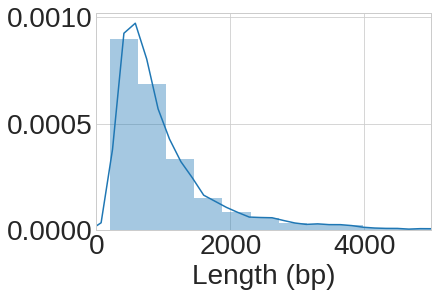

In [31]:
lengths = [len(s) for s in seqs]
sns.distplot(lengths)
plt.xlabel('Length (bp)')
plt.xlim((0, 5000))
plt.savefig('/home/jessime/Research/for_others/matera/lengths.pdf', bbox_inches='tight', dpi=600)
plt.show()

In [30]:
describe(lengths)

DescribeResult(nobs=7644, minmax=(200, 21216), mean=1150.544217687075, variance=2038462.8959903729, skewness=6.1073563560419615, kurtosis=57.11897640009772)

I'm going to move all of this work over to:

`/home/jessime/Dropbox/xist-like-rnas/for_matera`

In [45]:
flybase = '/home/jessime/Research/for_others/matera/ncRNA_genes_fb_2018_06.json'
flybase = json.load(open(flybase))
set([d['symbol'].split(':')[0] for d in flybase['data'] if ':' in d['symbol']])

{'18SrRNA',
 '28SrRNA',
 '2SrRNA',
 '5.8SrRNA',
 '5SrRNA',
 '7SLRNA',
 'Dana\\18SrRNA',
 'Dana\\5.8SrRNA',
 'Dana\\5SrRNA',
 'Dana\\snRNA',
 'Dana\\snoRNA',
 'Dana\\tRNA',
 'Dpse\\18SrRNA',
 'Dpse\\5.8SrRNA',
 'Dpse\\5SrRNA',
 'Dpse\\snRNA',
 'Dpse\\snoRNA',
 'Dpse\\tRNA',
 'Dsim\\5.8SrRNA',
 'Dsim\\5SrRNA',
 'Dsim\\snRNA',
 'Dsim\\snoRNA',
 'Dsim\\tRNA',
 'Dvir\\18SrRNA',
 'Dvir\\5.8SrRNA',
 'Dvir\\5SrRNA',
 'Dvir\\snRNA',
 'Dvir\\snoRNA',
 'Dvir\\tRNA',
 'RNaseMRP',
 'RNaseP',
 'Su(Ste)',
 'asRNA',
 'hpRNA',
 'lncRNA',
 'mt',
 'pre-rRNA',
 'scaRNA',
 'sisRNA',
 'snRNA',
 'snmRNA',
 'snoRNA',
 'tRNA'}

# float32 lookup time...

In [46]:
%aimport kmer_counts

In [47]:
infasta = '/home/jessime/Research/gencode/gencode.v22.lncRNA_transcripts.fa'
counter = kmer_counts.BasicCounter(infasta)

In [48]:
%timeit -n 1 -r 1 counter.get_counts()


25.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Line 158 is now `self.counts = np.zeros([len(self.seqs), 4**self.k])`

In [49]:
%aimport kmer_counts

In [50]:
infasta = '/home/jessime/Research/gencode/gencode.v22.lncRNA_transcripts.fa'
counter = kmer_counts.BasicCounter(infasta)

In [51]:
%timeit -n 1 -r 1 counter.get_counts()


26.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
query = 'ATGT'
q_counts = get_counts(query) #norm
background_fasta = 'human.fa'
background_counts = get_counts(background_fasta)
background_r_vals = [pearsonr(q_counts, bg_counts) for bg_counts in background_counts]
r_vals = []
ranks = []
target = 'ATATATATGG'
for tile in target:
    t_counts = get_counts(tile)
    r_val = pearsonr(tile, query)
    r_vals.append(r_val)
    rank.append(percentile(r_val, background_r_vals))
save(r_vals, ranks)

# Tracking gencode IDs

> Glad to hear the workflow ran without errors. But you're right, in the case of a gene containing both -201 and -001, my script selects both (unless you specify that you want to use two leading zeros, e.g. `-z 2`). I could make sure that no duplicate genes are selected by keeping track of ENSG IDs or something similar. What do you think?

> Thanks Jessime, yes the EnsG ID is a good idea – not sure how many times 201 and 001 co-occur, but I am sure it is non-zero. Mauro

This is for the seekr package. This first thing I want to check is, are the isoforms in numerical order?

In [1]:
!grep ">" /home/jessime/Research/gencode/gencode.v22.lncRNA_transcripts.fa > \
/home/jessime/Desktop/headers.txt

They aren't in numerical order... It might be fine if we can ensure the genes are grouped and never scattered.

In [8]:
%aimport fasta

In [9]:
maker = fasta.Maker('/home/jessime/Research/gencode/gencode.v22.lncRNA_transcripts.fa')

In [12]:
seen = set()
current = ''
for line in maker.names:
    data = line.split('|')
    gene_id = data[1]
    if gene_id != current: 
        if gene_id in seen:
            print(gene_id, ' is ungrouped...')
            break
        current = gene_id
        seen.add(gene_id)

In [14]:
len(seen)

15899

This looks a lot like we have a few dozen doubles. Let's see if we can track them down.

In [21]:
c = 0
transcripts = set()
current = ''
for line in maker.names:
    data = line.split('|')
    gene_id = data[1]
    transcript_id = data[4]
    if gene_id != current:
        current = gene_id
        transcripts = set()
    else:
        if transcript_id.endswith('01'):
            if transcripts:
                c += 1
                print(c)
                print(gene_id)
                print(transcript_id)
                print(transcripts)
                print()
            else:
                transcripts.add(transcript_id)

1
ENSG00000237094.10
RP4-669L17.10-001
{'RP4-669L17.10-201'}

2
ENSG00000177133.9
LINC00982-201
{'LINC00982-001'}

3
ENSG00000218510.5
LINC00339-201
{'LINC00339-001'}

4
ENSG00000249087.5
ZNF436-AS1-201
{'ZNF436-AS1-001'}

5
ENSG00000267272.4
LINC01140-201
{'LINC01140-001'}

6
ENSG00000232044.6
LINC01105-201
{'LINC01105-001'}

7
ENSG00000226674.7
TEX41-001
{'TEX41-101'}

8
ENSG00000198590.10
C3orf35-201
{'C3orf35-001'}

9
ENSG00000242808.6
SOX2-OT-201
{'SOX2-OT-001'}

10
ENSG00000242086.7
LINC00969-101
{'LINC00969-001'}

11
ENSG00000178722.11
C5orf64-201
{'C5orf64-001'}

12
ENSG00000236882.6
LINC01554-201
{'LINC01554-001'}

13
ENSG00000215022.6
RP1-257A7.4-201
{'RP1-257A7.4-001'}

14
ENSG00000277661.3
XXbac-BPG258E24.10-201
{'XXbac-BPG258E24.10-001'}

15
ENSG00000204623.7
ZNRD1-AS1-001
{'ZNRD1-AS1-201'}

16
ENSG00000203711.10
C6orf99-201
{'C6orf99-001'}

17
ENSG00000182648.10
LINC01006-201
{'LINC01006-001'}

18
ENSG00000249859.6
PVT1-201
{'PVT1-001'}

19
ENSG00000229582.3
RP11-423C15.3

In [17]:
15899 + 49 - 15953

-5

Off by 5 transcripts...

# example

In [7]:
%aimport gtf

In [9]:
gtf_path = '/home/jessime/Research/mrna_lncrna/M14_lnc_pc_un_sp201.gtf'
out_path = '/home/jessime/Desktop/test.gtf'
maker = gtf.Maker(gtf_path, out_path)

maker.inGTF.head()

maker.filter_feature()

maker.featureDF.head()

seqname  source     feature    start      end score strand frame  \
0    chr1  HAVANA        gene  3073253  3074322     .      +     .   
1    chr1  HAVANA  transcript  3073253  3074322     .      +     .   
2    chr1  HAVANA        exon  3073253  3074322     .      +     .   
3    chr1  HAVANA        gene  3365731  3368549     .      -     .   
4    chr1  HAVANA  transcript  3365731  3368549     .      -     .   

                                           attribute  
0  gene_id "ENSMUSG00000102693.1"; gene_type "TEC...  
1  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
2  gene_id "ENSMUSG00000102693.1"; transcript_id ...  
3  gene_id "ENSMUSG00000103377.1"; gene_type "TEC...  
4  gene_id "ENSMUSG00000103377.1"; transcript_id ...

In [13]:
maker.outGTF = 
maker.save(maker.featureDF)

In [7]:
!mv /home/jessime/Research/for_others/David/my_example/v26_full_unspliced_id2name.csv \
/home/jessime/Research/for_others/David/my_example/v26_full_unspliced_id2name_old.csv

In [12]:
in_path = '/home/jessime/Research/for_others/David/my_example/v26_full_unspliced_id2name_old.csv'
out_path = '/home/jessime/Research/for_others/David/my_example/v26_full_unspliced_id2name.tab'

df = pd.read_csv(in_path, index_col=0)
df.head()

transcript_id            gene_id       common  spliced
0         UNSPLICED0  ENSG00000223972.5   DDX11L1-un    False
1  ENST00000456328.2  ENSG00000223972.5  DDX11L1-002     True
2  ENST00000450305.2  ENSG00000223972.5  DDX11L1-001     True
3         UNSPLICED1  ENSG00000227232.5    WASH7P-un    False
4  ENST00000488147.1  ENSG00000227232.5   WASH7P-001     True

In [13]:
df.set_index('transcript_id', inplace=True)
df.to_csv(out_path, sep='\t')

# Protein profiles

Here's the last experiment I want to do before the defense:

* Get all expressed transcripts in K562 and HepG2 cells.
* Download all eCLIP bed files.
* Count number of basepairs covered by peaks for each transcripts.
* Find transcripts with Xist-like binding profiles.
* Ask if there is a correlation between the binding profile and the kmer profile.
* Ask how many of the top hits are pre-mRNA transcripts.

All of this should be pretty straightforward, given the work I've already done. The first step of getting transcripts expression levels has already been completed, for example.

To start, I'm going to get the downloading up and running. It might take a while to get all of the experiments downloaded.

On longleaf, I'm using `~/submissions/protein_LR/download_files.sh` to download all the bedfiles from `/home/jessime/Research/proteins/new_eCLIP/files.txt`. I need to be able to map from the name of the downloaded file to the cell type and protein. I've got that metadata saved locally:

In [7]:
eclip_metadata = '/home/jessime/Research/proteins/new_eCLIP/Experiment Report 2019_2_25.tsv'
eclip_metadata = pd.read_csv(eclip_metadata, skiprows=1, sep='\t', index_col=0)
columns = [
    'Biosample',
    'Target label',
    'Target gene',
    'Files'
]
eclip_metadata = eclip_metadata[~eclip_metadata['Target gene'].isnull()]
eclip_metadata = eclip_metadata[columns]
print(eclip_metadata.shape)
eclip_metadata.head(10)

(223, 4)


Biosample Target label Target gene  \
ID                                                             
/experiments/ENCSR196INN/      K562        RBM15       RBM15   
/experiments/ENCSR774RFN/      K562         FXR1        FXR1   
/experiments/ENCSR841EQA/     HepG2        TAF15       TAF15   
/experiments/ENCSR135VMS/     HepG2        LSM11       LSM11   
/experiments/ENCSR339FUY/     HepG2        PCBP2       PCBP2   
/experiments/ENCSR059CWF/      K562         SBDS        SBDS   
/experiments/ENCSR571ROL/     HepG2        XRCC6       XRCC6   
/experiments/ENCSR529FKI/      K562         YBX3        YBX3   
/experiments/ENCSR923NKN/      K562        DDX55       DDX55   
/experiments/ENCSR867DSZ/      K562         NPM1        NPM1   

                                                                       Files  
ID                                                                            
/experiments/ENCSR196INN/  /files/ENCFF688FME/,/files/ENCFF418DFE/,/files...  
/experiments/ENCSR774RFN/  /files/ENCFF004KTT/,/files/ENCFF191BRO/,/files...  
/experiments/ENCSR841EQA/  /files/ENCFF456KCB/,/files/ENCFF185GGV/,/files...  
/experiments/ENCSR135VMS/  /files/ENCFF407UHQ/,/files/ENCFF754DEC/,/files...  
/experiments/ENCSR339FUY/  /files/ENCFF332NKK/,/files/ENCFF359KSX/,/files...  
/experiments/ENCSR059CWF/  /files/ENCFF523LSW/,/files/ENCFF114WDK/,/files...  
/experiments/ENCSR571ROL/  /files/ENCFF464GUK/,/files/ENCFF202EFD/,/files...  
/experiments/ENCSR529FKI/  /files/ENCFF655OVT/,/files/ENCFF631SCU/,/files...  
/experiments/ENCSR923NKN/  /files/ENCFF992HTJ/,/files/ENCFF782ZSQ/,/files...  
/experiments/ENCSR867DSZ/  /files/ENCFF217PBP/,/files/ENCFF741BIN/,/files...

## Replicates

In [11]:
bed_files = '/home/jessime/Research/proteins/new_eCLIP/bed_files_ls.txt'
with open(bed_files) as infile:
    bed_files_set = set()
    for line in infile:
        bed = line.strip().split()[-1].strip('.bed')
        bed_files_set.add(bed)
print(len(bed_files_set))

1123


In [17]:
file_names = eclip_metadata['Files'].iloc[0].replace('files', '').replace('/', '').split(',')
first_experiment_bed_files = [fn for fn in file_names if fn in bed_files_set]
first_experiment_bed_files

['ENCFF527BMM', 'ENCFF715SCF', 'ENCFF404OSK', 'ENCFF529RBH', 'ENCFF006CBO']

Hmmm... This metadata file I got while downloading seems more valuable. Let's try that instead.

In [7]:
eclip_metadata = '/home/jessime/Research/proteins/new_eCLIP/metadata.tsv'
eclip_metadata = pd.read_csv(eclip_metadata, sep='\t')
print(eclip_metadata.shape)
eclip_metadata.head()

(1123, 46)


File accession     File format Output type Experiment accession  Assay  \
0    ENCFF993NVI  bed narrowPeak       peaks          ENCSR828ZID  eCLIP   
1    ENCFF877KBJ  bed narrowPeak       peaks          ENCSR828ZID  eCLIP   
2    ENCFF556EBT  bed narrowPeak       peaks          ENCSR828ZID  eCLIP   
3    ENCFF754XAQ  bed narrowPeak       peaks          ENCSR828ZID  eCLIP   
4    ENCFF288MWL  bed narrowPeak       peaks          ENCSR828ZID  eCLIP   

  Biosample term id Biosample term name Biosample type Biosample organism  \
0       EFO:0001187               HepG2      cell line       Homo sapiens   
1       EFO:0001187               HepG2      cell line       Homo sapiens   
2       EFO:0001187               HepG2      cell line       Homo sapiens   
3       EFO:0001187               HepG2      cell line       Homo sapiens   
4       EFO:0001187               HepG2      cell line       Homo sapiens   

   Biosample treatments  ...  \
0                   NaN  ...   
1                   NaN  ...   
2                   NaN  ...   
3                   NaN  ...   
4                   NaN  ...   

                                   File download URL  Assembly Platform  \
0  https://www.encodeproject.org/files/ENCFF993NV...      hg19      NaN   
1  https://www.encodeproject.org/files/ENCFF877KB...      hg19      NaN   
2  https://www.encodeproject.org/files/ENCFF556EB...      hg19      NaN   
3  https://www.encodeproject.org/files/ENCFF754XA...    GRCh38      NaN   
4  https://www.encodeproject.org/files/ENCFF288MW...    GRCh38      NaN   

  Controlled by  File Status Restricted Audit WARNING  \
0           NaN     released        NaN           NaN   
1           NaN     released        NaN           NaN   
2           NaN     released        NaN           NaN   
3           NaN     released        NaN           NaN   
4           NaN     released        NaN           NaN   

                 Audit INTERNAL_ACTION  Audit NOT_COMPLIANT Audit ERROR  
0  mismatched file status, missing RIN                  NaN         NaN  
1  mismatched file status, missing RIN                  NaN         NaN  
2  mismatched file status, missing RIN                  NaN         NaN  
3  mismatched file status, missing RIN                  NaN         NaN  
4  mismatched file status, missing RIN                  NaN         NaN  

[5 rows x 46 columns]

In [8]:
eclip_GRCh38 = eclip_metadata[eclip_metadata['Assembly'] == 'GRCh38']
eclip_GRCh38.shape

(446, 46)

In [9]:
446/2

223.0

In [10]:
columns = [
    'File accession',
    'Experiment accession',
    'Biosample term name',
    'Experiment target',
    'Biological replicate(s)',
    'Derived from',
]

In [11]:
eclip_metadata = eclip_GRCh38[columns]
useful_metadata = '/home/jessime/Research/proteins/new_eCLIP/metadata_useful.tsv'
eclip_metadata.to_csv(useful_metadata, sep='\t', index=None)
eclip_metadata.head()

File accession Experiment accession Biosample term name Experiment target  \
3     ENCFF754XAQ          ENCSR828ZID               HepG2      HNRNPK-human   
4     ENCFF288MWL          ENCSR828ZID               HepG2      HNRNPK-human   
8     ENCFF496SLO          ENCSR081JYH                K562       NSUN2-human   
9     ENCFF062YKQ          ENCSR081JYH                K562       NSUN2-human   
13    ENCFF341KSL          ENCSR128VXC                K562        SND1-human   

   Biological replicate(s)              Derived from  
3                        1  ENCFF019JFZ, ENCFF198ISB  
4                        2  ENCFF019JFZ, ENCFF553XCL  
8                        2  ENCFF568SAI, ENCFF790KXQ  
9                        1  ENCFF568SAI, ENCFF862LPP  
13                       1  ENCFF351QXF, ENCFF438IIB

In [12]:
set(eclip_metadata['Experiment accession'].value_counts())

{2}

Each experiment has exactly two replicates.

Let's get the most really most relevant data.

In [14]:
exp_id2type_df = eclip_metadata[['File accession', 'Experiment accession']].copy()
type_ls = []
for i, row in eclip_metadata.iterrows():
    protein = row['Experiment target'].strip('-human') 
    cell = row['Biosample term name']
    type_ls.append(f'{protein}_{cell}')
exp_id2type_df['type'] = type_ls
exp_id2type_df.head()

File accession Experiment accession          type
3     ENCFF754XAQ          ENCSR828ZID  HNRNPK_HepG2
4     ENCFF288MWL          ENCSR828ZID  HNRNPK_HepG2
8     ENCFF496SLO          ENCSR081JYH    NSUN2_K562
9     ENCFF062YKQ          ENCSR081JYH    NSUN2_K562
13    ENCFF341KSL          ENCSR128VXC     SND1_K562

In [15]:
exp_id2type_df.set_index('File accession', inplace=True)
exp_id2type_df.head()

Experiment accession          type
File accession                                   
ENCFF754XAQ             ENCSR828ZID  HNRNPK_HepG2
ENCFF288MWL             ENCSR828ZID  HNRNPK_HepG2
ENCFF496SLO             ENCSR081JYH    NSUN2_K562
ENCFF062YKQ             ENCSR081JYH    NSUN2_K562
ENCFF341KSL             ENCSR128VXC     SND1_K562

In [16]:
outfile = '/home/jessime/Research/proteins/new_eCLIP/exp_id2type.csv'
exp_id2type_df.to_csv(outfile)

## bash script

Let's use this data to programatically make a bash script I want to submit.

In [31]:
groupby_experiment = defaultdict(list)
for i, row in eclip_metadata.iterrows():
    groupby_experiment[row['Experiment accession']].append(row['File accession'])

In [29]:
base = """#!/bin/bash

#SBATCH -n 1
#SBATCH -t 8:00:00
#SBATCH --mem 12G
#SBATCH --workdir /pine/scr/j/e/jessime/protein_LR/

module load bedtools

"""
print(base)

#!/bin/bash

#SBATCH -n 1
#SBATCH -t 8:00:00
#SBATCH --mem 12G
#SBATCH --workdir /pine/scr/j/e/jessime/protein_LR/

module load bedtools




In [33]:
shell_script = '/home/jessime/Research/proteins/new_eCLIP/coverage.sh'
cmd_base = 'bedtools coverage -a v26_lnc_pc_un_sp001_sorted.gtf -b beds/{}.bed beds/{}.bed -s > coverage/{}.bed\n'
with open(shell_script, 'w') as shell_script:
    shell_script.write(base)
    for exp, replicates in groupby_experiment.items():
        shell_script.write(cmd_base.format(replicates[0], replicates[1], exp))

Get files from groupby folder.

Now, I should just need the exon row data from each of these files, and I can delete the extra data.

In [7]:
!mkdir /home/jessime/Research/proteins/new_eCLIP/exon_coverage

In [21]:
exp_id2type_df2 = exp_id2type_df.set_index('Experiment accession')
exp_id2type = exp_id2type_df2.to_dict()['type']

In [39]:
base_df = '/home/jessime/Research/mrna_lncrna/v26_sorted_gtf_ids_names.tab'
base_df = pd.read_csv(base_df, index_col=0, sep='\t')
print(base_df.shape)
base_df.head()

(65679, 1)


transcript_name
transcript_id                     
UNSPLICED2          MIR1302-2HG-un
ENST00000473358.1  MIR1302-2HG-001
UNSPLICED3              FAM138A-un
ENST00000417324.1      FAM138A-001
ENST00000335137.3        OR4F5-001

In [42]:
in_dir = Path('/home/jessime/Research/proteins/new_eCLIP/groupby/')

for path in in_dir.glob('*'):
    exp_id = path.parts[-1].strip('.tab')
    df = pd.read_csv(path, header=None, sep='\t')
    df = df[df[2] == 'exon']
    df['coverage'] = df[3] / df[4]
    base_df[exp_id2type[exp_id]] = df['coverage'].values

In [43]:
!rm -rf /home/jessime/Research/proteins/new_eCLIP/exon_coverage

In [47]:
outfile = '/home/jessime/Research/proteins/new_eCLIP/transcript_coverage.tab'
base_df.to_csv(outfile, sep='\t', float_format='%.5f')

In [51]:
flat_vals = base_df[base_df.columns[1:]].values.ravel()

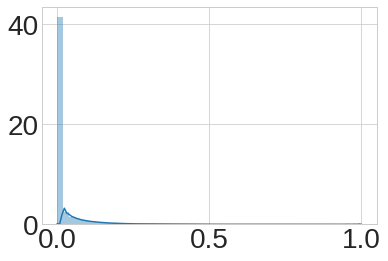

In [52]:
sns.distplot(flat_vals)

In [53]:
describe(flat_vals)

DescribeResult(nobs=14646417, minmax=(0.0, 1.0), mean=0.017445498697773308, variance=0.0027439366241734423, skewness=5.451342466495178, kurtosis=42.28459718208706)

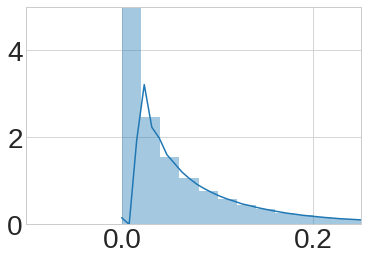

In [54]:
sns.distplot(flat_vals)
plt.xlim((-.1, .25))
plt.ylim((0, 5))
plt.show()

## expressed exon coverage

`/home/jessime/Research/proteins/new_eCLIP/transcript_coverage.tab` is probably one of the last useful files I'll produce here. I've just gone through verification, by spot checking protein binding peaks in UCSC for XIST and KCNQ1(OT1). Everything looks good, and it looks like we're going to have some interesting profiles.

But before I start digging too much, I need to filter these transcripts for those that are actually expressed in K562/HepG2 cells. I can't have 0s floating around in the profiles just because the transcript isn't expressed.